# Data Mining Project -Algerian Forest Fires Clasifications

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, reading data
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
df=pd.read_csv("Algerian_forest_fires_dataset.csv",header=0) #loading dataset

In [3]:
df.head()

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia Region Dataset
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia Region Dataset
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia Region Dataset
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia Region Dataset
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia Region Dataset


# Attribute Information :

Period Covered

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

Weather data observations

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
RH : Relative Humidity in %: 21 to 90
Ws :Wind speed in km/h: 6 to 29
Rain: total day in mm: 0 to 16.8

FWI Components

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI system: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, namely fire and not fire

Region: two region, namely Bejaia Region Dataset and Sidi-Bel Abbes Region Dataset


In [4]:
df.shape

(244, 15)

That means dataset has 15 attributes and 244 instance 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          244 non-null    int64  
 1   Month        244 non-null    int64  
 2   Year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


In [6]:
df.isnull().sum()

Day            0
Month          0
Year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [7]:
df.columns

Index(['Day', 'Month', 'Year', 'Temperature', ' RH', ' Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [8]:
df[df['Classes'].isnull()]

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes Region Dataset


In [9]:
df.drop(df[df['Classes'].isnull()].index, inplace=True)

In [10]:
df.loc[160:170]

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
160,9,7,2012,36,43,15,1.9,82.3,9.4,9.9,3.2,9.0,3.1,fire,Sidi-Bel Abbes Region Dataset
161,10,7,2012,34,51,16,3.8,77.5,8.0,9.5,2.0,7.7,1.3,not fire,Sidi-Bel Abbes Region Dataset
162,11,7,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,not fire,Sidi-Bel Abbes Region Dataset
163,12,7,2012,36,44,13,0.0,90.1,12.6,19.4,8.3,12.5,9.6,fire,Sidi-Bel Abbes Region Dataset
164,13,7,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire,Sidi-Bel Abbes Region Dataset
166,15,7,2012,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,fire,Sidi-Bel Abbes Region Dataset
167,16,7,2012,31,83,17,0.0,84.5,19.4,33.1,4.7,19.2,7.3,fire,Sidi-Bel Abbes Region Dataset
168,17,7,2012,32,81,17,0.0,84.6,21.1,42.3,4.7,20.9,7.7,fire,Sidi-Bel Abbes Region Dataset
169,18,7,2012,33,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,fire,Sidi-Bel Abbes Region Dataset
170,19,7,2012,34,58,16,0.0,88.1,27.8,61.1,7.3,27.7,13,fire,Sidi-Bel Abbes Region Dataset


In [11]:
df = df.reset_index(drop=True)

In [12]:
df.loc[160:170]

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
160,9,7,2012,36,43,15,1.9,82.3,9.4,9.9,3.2,9.0,3.1,fire,Sidi-Bel Abbes Region Dataset
161,10,7,2012,34,51,16,3.8,77.5,8.0,9.5,2.0,7.7,1.3,not fire,Sidi-Bel Abbes Region Dataset
162,11,7,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,not fire,Sidi-Bel Abbes Region Dataset
163,12,7,2012,36,44,13,0.0,90.1,12.6,19.4,8.3,12.5,9.6,fire,Sidi-Bel Abbes Region Dataset
164,13,7,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire,Sidi-Bel Abbes Region Dataset
165,15,7,2012,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,fire,Sidi-Bel Abbes Region Dataset
166,16,7,2012,31,83,17,0.0,84.5,19.4,33.1,4.7,19.2,7.3,fire,Sidi-Bel Abbes Region Dataset
167,17,7,2012,32,81,17,0.0,84.6,21.1,42.3,4.7,20.9,7.7,fire,Sidi-Bel Abbes Region Dataset
168,18,7,2012,33,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,fire,Sidi-Bel Abbes Region Dataset
169,19,7,2012,34,58,16,0.0,88.1,27.8,61.1,7.3,27.7,13,fire,Sidi-Bel Abbes Region Dataset


In [13]:
df.isnull().sum()

Day            0
Month          0
Year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

# Dropping the year column as the data is for the same year

In [14]:
df['Year'].value_counts()


2012    243
Name: Year, dtype: int64

In [15]:
dfc1=df.drop(['Year'],axis=1)

In [16]:
dfc1.head()

,Day,Month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia Region Dataset
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia Region Dataset
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia Region Dataset
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia Region Dataset
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia Region Dataset


# Values in df[Classes] has unnecessary spaces that are removed by str.strip()



In [17]:
dfc1.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [18]:
dfc1.Classes=dfc1.Classes.str.strip()
dfc1.Classes.unique()

array(['not fire', 'fire'], dtype=object)

# Encoding not fire as 0 and Fire as 1 and 0 and 1 for regions

In [19]:
dfc1['Region']=df['Region'].astype('string')

In [20]:
dfc1['Classes']=np.where(dfc1['Classes']=='not fire',"0","1")
dfc1['Region']=np.where(dfc1['Region']=='Sidi-Bel Abbes Region Dataset',"0","1")

#dfc1

In [21]:
dfc1.loc[120:130]

,Day,Month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0,1
121,30,9,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,0,1
122,1,6,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0,0
123,2,6,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0,0
124,3,6,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,0
125,4,6,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,0,0
126,5,6,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0,0
127,6,6,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,1,0
128,7,6,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,1,0
129,8,6,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,0,0


# Converting the Necessary Column Datatype to Float and Int

In [22]:
type(df.FWI[0])

str

In [23]:
dfc1[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=dfc1[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')
dfc1[['Classes','Region']]=dfc1[['Classes','Region']].astype('int')

In [24]:
type(df.FWI[0])

str

In [25]:
dfc1.dtypes

Day              int64
Month            int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int32
Region           int32
dtype: object

# Plotting Pie chart



In [26]:
dfc1

,Day,Month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0


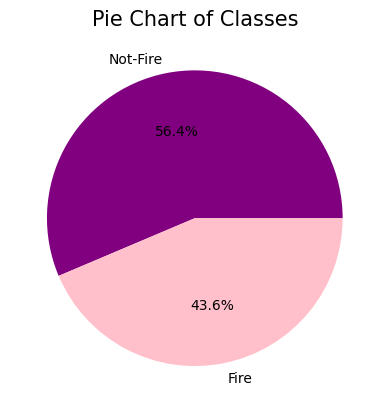

In [27]:
import matplotlib.pyplot as plt
#not fire =0 fire =1
# Extract the data from the DataFrame
labels = ['Not-Fire' , 'Fire']
percentage = dfc1['Classes'].value_counts(normalize=True).values

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the pie chart
ax.pie(percentage, labels=labels, autopct='%1.1f%%', colors=["purple","pink"])
plt.title("Pie Chart of Classes", fontsize=15)

# Show the plot
plt.show()

# Forest Fire Temperature Box Plot


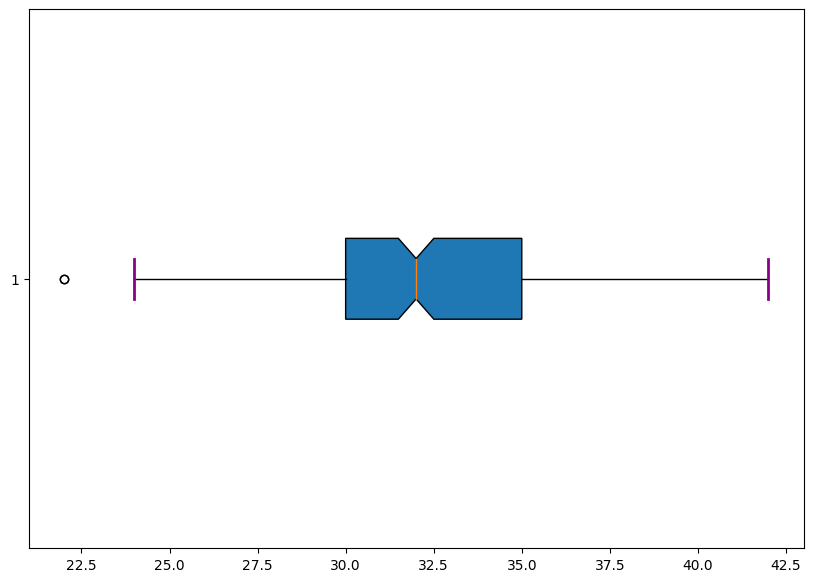

In [28]:
# Creating dataset
data = dfc1["Temperature"]
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
bp = plt.boxplot(data, patch_artist = True,notch ='True', vert = 0)
plt.setp(bp["caps"], color ='#8B008B',linewidth = 2)
 
# show plot
plt.show()


###  Histogram

A histogram is basically used to represent data provided in a form of same groups

<AxesSubplot: >

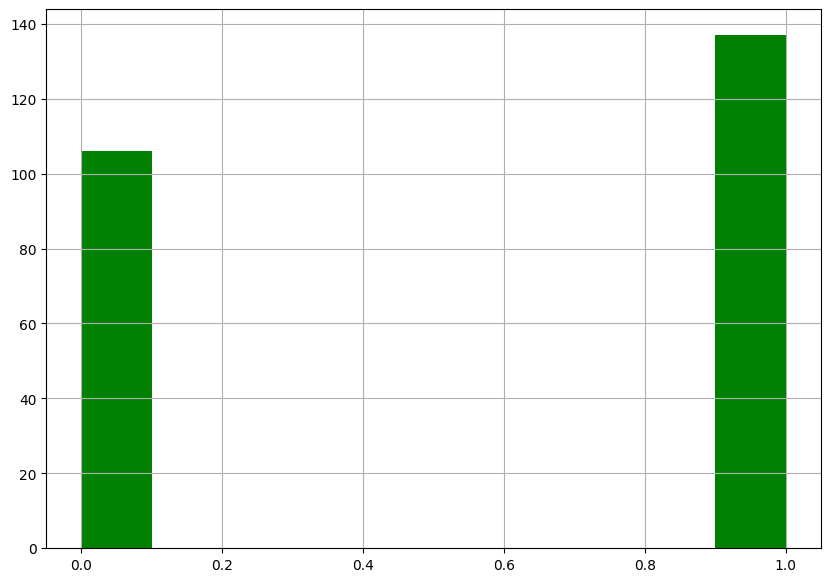

In [29]:
dfc1["Classes"].hist(figsize=(10,7),color='green')

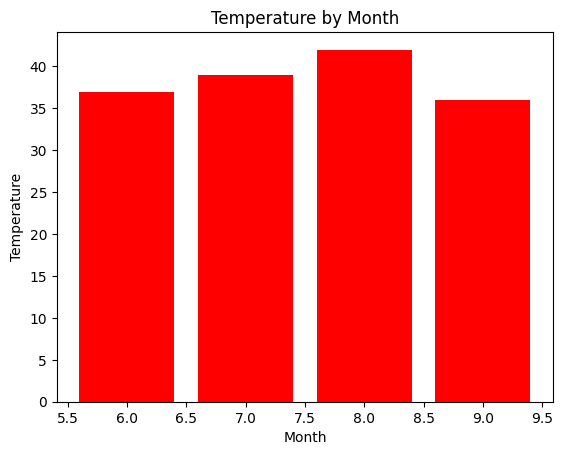

In [30]:
# Extract the data from the DataFrame
x = df['Month']
y = df['Temperature']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the bar chart
ax.bar(x, y, color='r')

# Set the title and axis labels
ax.set_title('Temperature by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature')

# Show the plot
plt.show()

<AxesSubplot: xlabel='Month'>

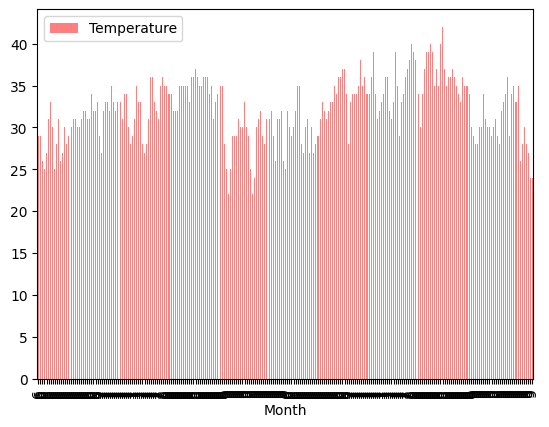

In [31]:

# Extract the data from the DataFrame
x = 'Month'
y = 'Temperature'

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the bar chart
df.plot.bar(x=x, y=y, ax=ax, color='r', alpha=0.5, width=0.5)

# Set the title and axis labels
ax

In [32]:
dfc1.head()

,Day,Month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [33]:

dfc1['Classes'].unique()


array([0, 1])

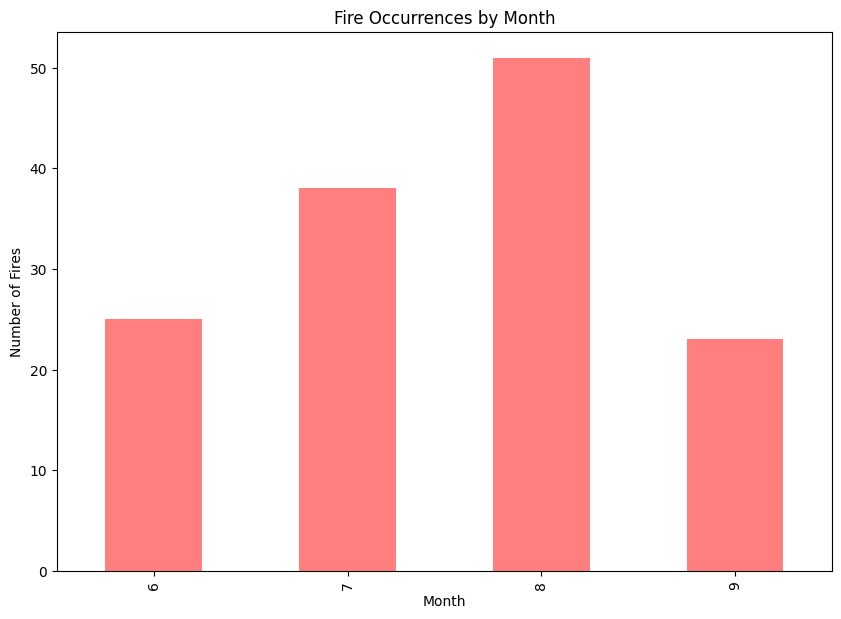

In [34]:
import matplotlib.pyplot as plt

# Group the data by month
monthly_groups = dfc1.groupby('Month')

# Count the number of "fire" occurrences in each group
counts = monthly_groups['Classes'].apply(lambda x: (x == 1).sum())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10,7))

# Plot the bar chart
counts.plot.bar(ax=ax, color='r', alpha=0.5, width=0.5)

# Set the title and axis labels
ax.set_title('Fire Occurrences by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Fires')

# Show the plot
plt.show()


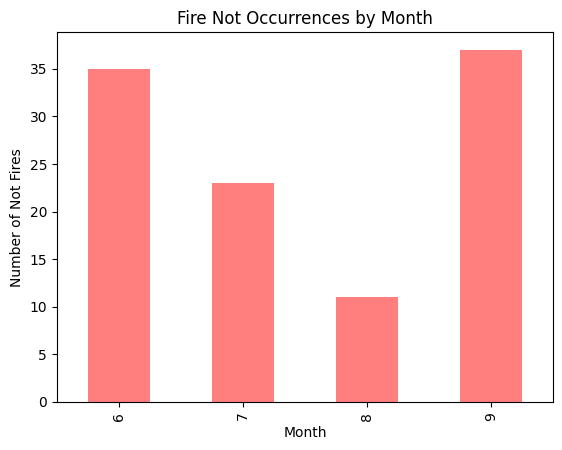

In [35]:
# Group the data by month
monthly_groups = dfc1.groupby('Month')

# Count the number of "fire" occurrences in each group
counts = monthly_groups['Classes'].apply(lambda x: (x == 0).sum())

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the bar chart
counts.plot.bar(ax=ax, color='r', alpha=0.5, width=0.5)

# Set the title and axis labels
ax.set_title('Fire Not Occurrences by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Not Fires')

# Show the plot
plt.show()

# finding the correlation between different variables using pearson method.


In [36]:
dfc1.corr()

,Day,Month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,-0.000821
Month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,-0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,-0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,-0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,-0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,-0.263197


<AxesSubplot: >

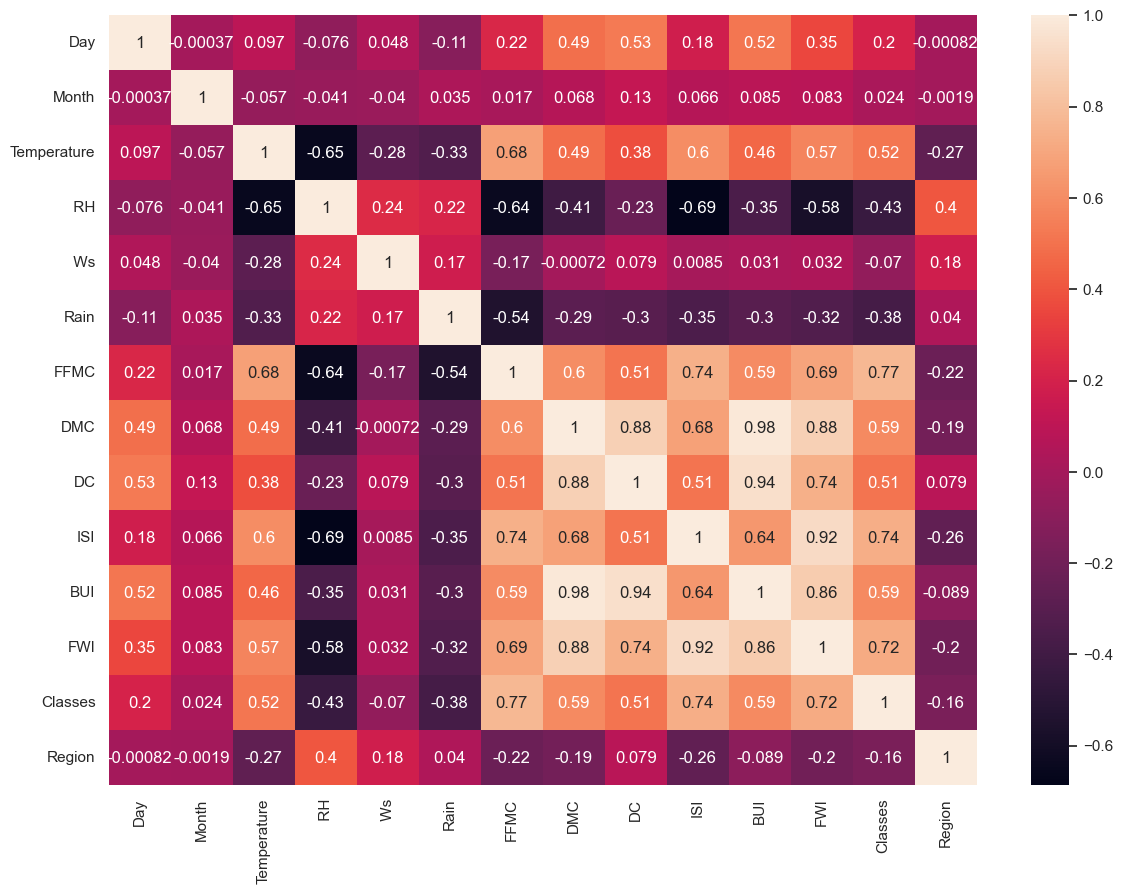

In [37]:
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(dfc1.corr(),annot=True)

RH is negatively corelated with Temperature, FFMC and ISI

Rain is negatively correlated with Temperature and FFMC,DMC, ISI and BUI

plt.scatter(dfc1['DMC'],dfc1['Temperature'])
plt.xlabel("DMC")
plt.ylabel("Temperature")
sns.regplot(x='DMC',y='Temperature',data=dfc1)


plt.scatter(dfc1['FWI'],dfc1['Temperature'])
plt.xlabel("FWI")
plt.ylabel("Temperature")

sns.regplot(x='FWI',y='Temperature',data=dfc1)

plt.scatter(dfc1['FFMC'],dfc1['Temperature'])
plt.xlabel("FFMC")
plt.ylabel("Temperature")

sns.regplot(x='FFMC',y='Temperature',data=dfc1)



In [38]:
X = dfc1[['Temperature', ' RH', ' Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Month','Region']]
y = dfc1['Classes']


In [39]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Preprocessing pipeline for numerical columns
numeric_features = ['Temperature', ' RH', ' Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical columns
categorical_features = ['Month', 'Region']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [40]:
# Build and train the KNN classifier
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
knn_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', ' RH', ' Ws',
                                                   'Rain', 'FFMC', 'DMC', 'ISI',
                                                   'BUI']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'Region'])])),
                ('classifier', KNeighborsClassifier())])

In [41]:
# Build and train the linear regression model
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', ' RH', ' Ws',
                                                   'Rain', 'FFMC', 'DMC', 'ISI',
                                                   'BUI']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'Region'])])),
                ('regressor', LinearRegression())])

In [42]:
# Build and train the logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', ' RH', ' Ws',
                                                   'Rain', 'FFMC', 'DMC', 'ISI',
                                                   'BUI']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'Region'])])),
                ('classifier', LogisticRegression())])

In [43]:
# Build and train the decision tree model
tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])
tree_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', ' RH', ' Ws',
                                                   'Rain', 'FFMC', 'DMC', 'ISI',
                                                   'BUI']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'Region'])])),
                ('classifier', DecisionTreeClassifier())])

In [44]:
# Build and train the K-Means model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clusterer', KMeans(n_clusters=2))
])
model.fit(X_train, y_train)



C:\Users\Elif\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', ' RH', ' Ws',
                                                   'Rain', 'FFMC', 'DMC', 'ISI',
                                                   'BUI']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'Region'])])),
                ('clusterer', KMeans(n_clusters=2))])

In [45]:
# Initialize a Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)



GaussianNB()

In [47]:
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('~~~~~~~~ KNN Model Evaluation ~~~~~~~~')
print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1 Score:', f1)

# Calculate evaluation metrics for decision tree model
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('~~~~~~~~ Decision Tree Model Evaluation ~~~~~~~~')
print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1 Score:', f1)
# Make predictions on the test data for naive bayes
y_pred = nb_classifier.predict(X_test)
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('~~~~~~~~ Naive Bayes Model Evaluation ~~~~~~~~')
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
# Calculate evaluation metrics for linear regression model
homogeneity = homogeneity_score(y_test, y_pred)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
# Calculate the r-squared score
r2 = r2_score(y_test, y_pred)
# Print the evaluation scores
print('~~~~~~~~ Linear regression ~~~~~~~~')
print('Homogeneity Score:', homogeneity)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)


# Calculate evaluation metrics for logistic regression model
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
homogeneity = homogeneity_score(y_test, y_pred)
print('~~~~~~~~ Logistic regression ~~~~~~~~')
print('Homogeneity Score:', homogeneity)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)


# Predict the cluster labels on the test data
y_pred = model.predict(X_test)
# Evaluate the model using the homogeneity score
homogeneity = homogeneity_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('~~~~~~~~ K-means model regression ~~~~~~~~')
print('Homogeneity Score:', homogeneity)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)


~~~~~~~~ KNN Model Evaluation ~~~~~~~~
Accuracy: 0.8367346938775511
Recall: 0.8518518518518519
Precision: 0.8518518518518519
F1 Score: 0.8518518518518519
~~~~~~~~ Decision Tree Model Evaluation ~~~~~~~~
Accuracy: 0.9591836734693877
Recall: 0.9629629629629629
Precision: 0.9629629629629629
F1 Score: 0.9629629629629629
~~~~~~~~ Naive Bayes Model Evaluation ~~~~~~~~
Accuracy: 0.92
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
~~~~~~~~ Linear regression ~~~~~~~~
Homogeneity Score: 0.5896782195968967
Mean Squared Error: 0.08163265306122448
Mean Absolute Error: 0.08163265306122448
R-squared Score: 0.67003367003367
~~~~~~~~ Logistic regression ~~~~~~~~
Homogeneity Score: 0.9999999999999997
Mean Squared Error: 0.0870753472472789
Mean Absolute Error: 0.25378865522883837
R-squared Score: 0.6480338236688272
~~~~~~~~ K-means model regression ~~~~~~~~
Homogeneity Score: 0.2155996864563573
Mean Squared Error: 0.7346938775510204
Mean Absolute Error: 0.7346938775510204
R-squared Score: -1.969696969696969

C:\Users\Elif\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
